In [1]:
import pydicom
import pandas as pd
from matplotlib import pyplot, cm
#import matplotlib.pyplot as plt
#or interactive visualizations

#plotly modules
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
from plotly import figure_factory as ff
from plotly.graph_objs import*
init_notebook_mode(connected=True)

#Windows modules
import webbrowser
from win32com.shell import shell
import win32ui, win32con
from shutil import copyfile
import sys
import os

#math modules
import numpy
import random
import copy
from matplotlib.path import Path

import pathlib

In [2]:
#FIRST IMPORTING AND PLOTING CT FILES

from tkinter import*
from tkinter import filedialog
from tkinter.filedialog import askdirectory

dir_path = askdirectory()
print(dir_path)

C:/Users/Serena/DoseFalloffv2


In [3]:
file_dir=pathlib.Path(dir_path).glob('CT*.dcm')
#only including dcm files that contain CT

In [4]:
from natsort import natsorted
file_dir=natsorted(file_dir)
#sorting in order all the files

In [5]:
len(file_dir)

152

In [6]:
file_dir

[WindowsPath('C:/Users/Serena/DoseFalloffv2/CT.1.2.246.352.71.3.63752751031.14431635.20160428153112.dcm'),
 WindowsPath('C:/Users/Serena/DoseFalloffv2/CT.1.2.246.352.71.3.63752751031.14431636.20160428153112.dcm'),
 WindowsPath('C:/Users/Serena/DoseFalloffv2/CT.1.2.246.352.71.3.63752751031.14431637.20160428153112.dcm'),
 WindowsPath('C:/Users/Serena/DoseFalloffv2/CT.1.2.246.352.71.3.63752751031.14431638.20160428153112.dcm'),
 WindowsPath('C:/Users/Serena/DoseFalloffv2/CT.1.2.246.352.71.3.63752751031.14431639.20160428153112.dcm'),
 WindowsPath('C:/Users/Serena/DoseFalloffv2/CT.1.2.246.352.71.3.63752751031.14431640.20160428153112.dcm'),
 WindowsPath('C:/Users/Serena/DoseFalloffv2/CT.1.2.246.352.71.3.63752751031.14431641.20160428153112.dcm'),
 WindowsPath('C:/Users/Serena/DoseFalloffv2/CT.1.2.246.352.71.3.63752751031.14431642.20160428153112.dcm'),
 WindowsPath('C:/Users/Serena/DoseFalloffv2/CT.1.2.246.352.71.3.63752751031.14431643.20160428153112.dcm'),
 WindowsPath('C:/Users/Serena/DoseFal

In [33]:
# Get ref file
slice = pydicom.read_file(file_dir[0]) #reading first file in directory. Tuple option?
#slices = pydicom.read_file(file_path)

#Following lines constructed from using header dcm information in each file. So

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
#ConstPixelDims = (int(slice.Rows), int(slice.Columns), len(file_dir))

# Load pixelspacing values (in mm)
#ConstPixelSpacing = (float(slice.PixelSpacing[0]), float(slice.PixelSpacing[1]), float(slice.SliceThickness))

In [34]:
ImagePositionPatient=slice.ImagePositionPatient
ImagePositionPatient

[-250, -250, 265]

In [ ]:
#x_mm = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])#start, end and steps of x
#y_mm = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
#z_mm = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [ ]:
#Absolute info setting
#how can I set start x and y position, if 3 stored together as Image position
#x_mm = numpy.arange(ImagePositionPatient[0], ImagePositionPatient[0]+(ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])#start, end and steps of x
#y_mm = numpy.arange(ImagePositionPatient[1], (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
#z_mm = numpy.arange(ImagePositionPatient[2], (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [28]:
#if this is correct, it still only applies to one slice
import numpy as np
x_mmpositions=np.linspace(-250, (-250+(511*0.976562)), 512)
y_mmpositions=np.linspace(-250, (-250+(511*0.976562)), 512)
z_mmpositions=np.linspace(265, 265-(151*2.5), 152)

In [10]:
print (x_mmpositions)

[-2.50000000e+02 -2.49023438e+02 -2.48046876e+02 -2.47070314e+02
 -2.46093752e+02 -2.45117190e+02 -2.44140628e+02 -2.43164066e+02
 -2.42187504e+02 -2.41210942e+02 -2.40234380e+02 -2.39257818e+02
 -2.38281256e+02 -2.37304694e+02 -2.36328132e+02 -2.35351570e+02
 -2.34375008e+02 -2.33398446e+02 -2.32421884e+02 -2.31445322e+02
 -2.30468760e+02 -2.29492198e+02 -2.28515636e+02 -2.27539074e+02
 -2.26562512e+02 -2.25585950e+02 -2.24609388e+02 -2.23632826e+02
 -2.22656264e+02 -2.21679702e+02 -2.20703140e+02 -2.19726578e+02
 -2.18750016e+02 -2.17773454e+02 -2.16796892e+02 -2.15820330e+02
 -2.14843768e+02 -2.13867206e+02 -2.12890644e+02 -2.11914082e+02
 -2.10937520e+02 -2.09960958e+02 -2.08984396e+02 -2.08007834e+02
 -2.07031272e+02 -2.06054710e+02 -2.05078148e+02 -2.04101586e+02
 -2.03125024e+02 -2.02148462e+02 -2.01171900e+02 -2.00195338e+02
 -1.99218776e+02 -1.98242214e+02 -1.97265652e+02 -1.96289090e+02
 -1.95312528e+02 -1.94335966e+02 -1.93359404e+02 -1.92382842e+02
 -1.91406280e+02 -1.90429

In [29]:
print (z_mmpositions)

[ 265.   262.5  260.   257.5  255.   252.5  250.   247.5  245.   242.5
  240.   237.5  235.   232.5  230.   227.5  225.   222.5  220.   217.5
  215.   212.5  210.   207.5  205.   202.5  200.   197.5  195.   192.5
  190.   187.5  185.   182.5  180.   177.5  175.   172.5  170.   167.5
  165.   162.5  160.   157.5  155.   152.5  150.   147.5  145.   142.5
  140.   137.5  135.   132.5  130.   127.5  125.   122.5  120.   117.5
  115.   112.5  110.   107.5  105.   102.5  100.    97.5   95.    92.5
   90.    87.5   85.    82.5   80.    77.5   75.    72.5   70.    67.5
   65.    62.5   60.    57.5   55.    52.5   50.    47.5   45.    42.5
   40.    37.5   35.    32.5   30.    27.5   25.    22.5   20.    17.5
   15.    12.5   10.     7.5    5.     2.5    0.    -2.5   -5.    -7.5
  -10.   -12.5  -15.   -17.5  -20.   -22.5  -25.   -27.5  -30.   -32.5
  -35.   -37.5  -40.   -42.5  -45.   -47.5  -50.   -52.5  -55.   -57.5
  -60.   -62.5  -65.   -67.5  -70.   -72.5  -75.   -77.5  -80.   -82.5
  -85.

In [ ]:
#print (slice.pixel_array.dtype)

In [30]:
pydicom.read_file(file_dir[151])

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 184
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.246.352.71.3.63752751031.14432426.20160428153112
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.160.3
(0002, 0013) Implementation Version Name         SH: 'DCIE 16.1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'REFORMATTED']
(0008, 0012) Instance Creation Date              DA: '20210712'
(0008, 0013) Instance Creation Time              TM: '164630'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance

In [40]:
# The array is sized based on 'ConstPixelDims'
#Arraypydicom = numpy.zeros(ConstPixelDims, dtype=slice.pixel_array.dtype)#dtype datatype

# loop through all the DICOM files
#for filenameDCM in file_dir:
   # print(filenameDCM)
    # read the file
   # ds = pydicom.read_file(filenameDCM)
    # store the raw image data
 #   Arraypydicom[:, :, file_dir.index(filenameDCM)] = ds.pixel_array  
Arraypydicom=slice.pixel_array

In [17]:
print ( Arraypydicom . shape )

(512, 512)


ValueError: not enough values to unpack (expected 2, got 1)

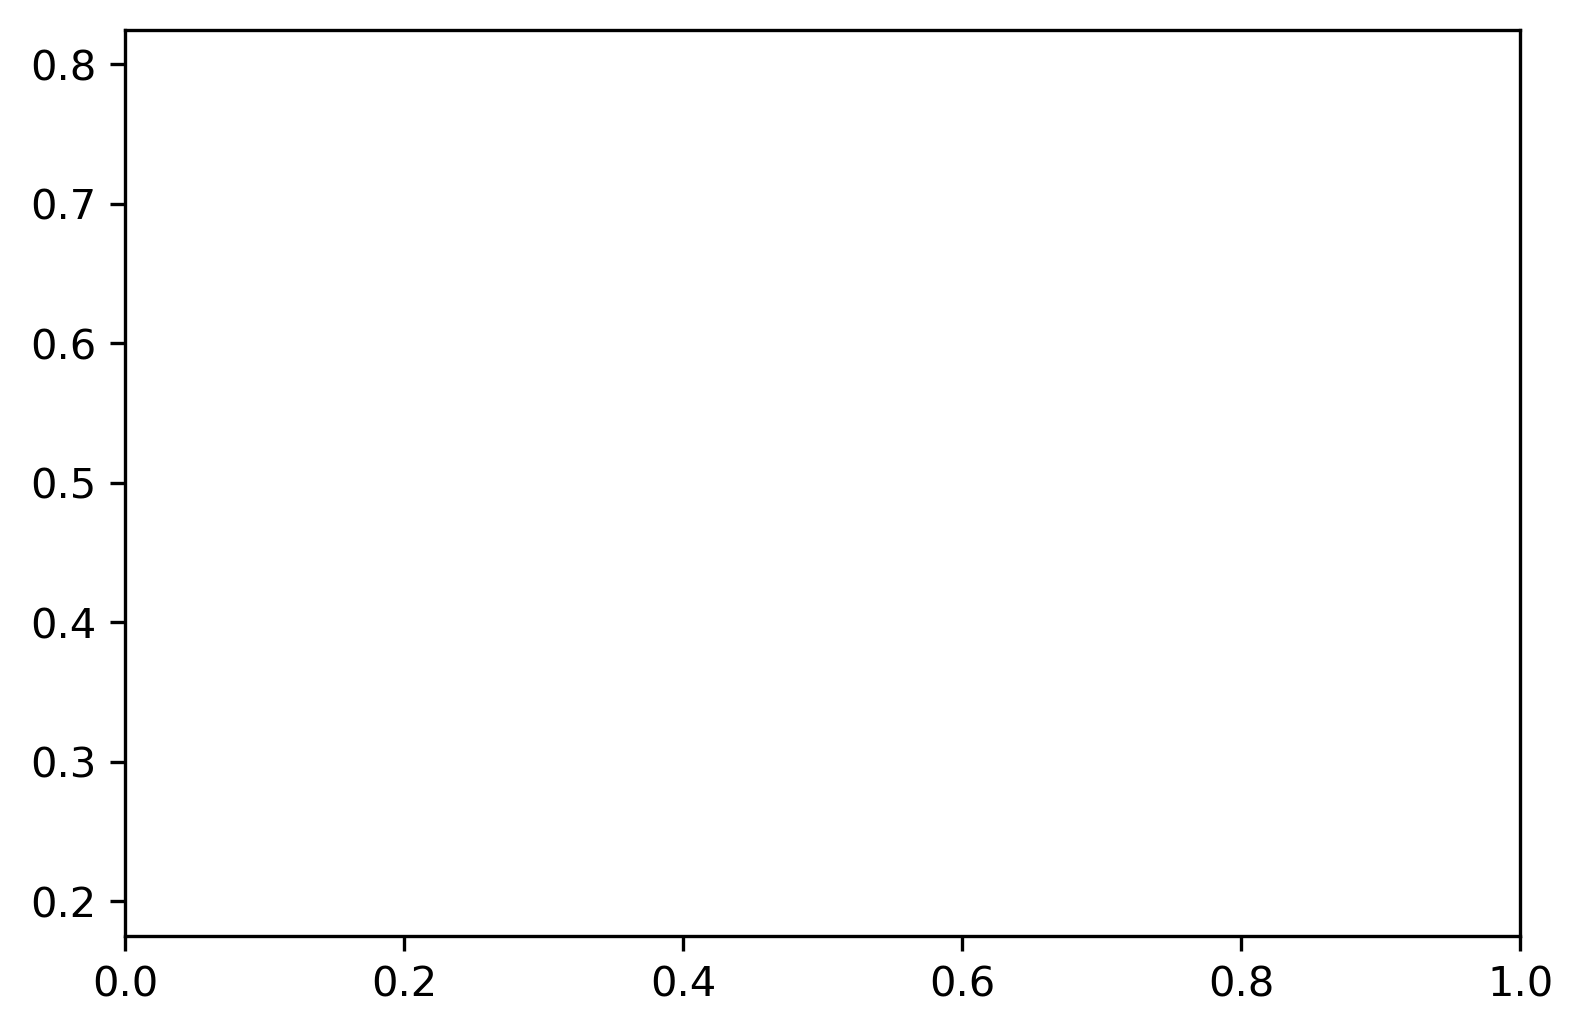

In [23]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x_mmpositions, y_mmpositions, Arraypydicom[0] )

In [ ]:
import plotly.graph_objs as go

# examply of scatter plot matplotlib.pyplot.scatter(x, y, cmap=color_map, c=color_range)
ct_Heatmap=go.Heatmap (x=x_mmpositions, y=y_mmpositions, z=Arraypydicom[:,:,50], colorscale="jet", opacity=0.2)

#Tests
#ct_Heatmap=go.Heatmap (x=x_mmpositions, y=y_mmpositions, z=z_mmpositions[:,:,50], colorscale="jet", opacity=0.8)
#ct_Heatmap=go.Heatmap (z=Arraypydicom[:,:,50], y=ymmpositions, x=xmmpositions, colorscale="jet", opacity=0.3)
go.Figure(data=ct_Heatmap)

In [ ]:
#THIS SECTION IS NOW THE IMPORT OF THE DOSE FILE

import tkinter as tK
from tkinter import*
from tkinter import filedialog

root=tK.Tk()
root.withdraw()
file_path=filedialog.askopenfilename()

print(file_path)

In [ ]:
from pydicom import dcmread
#from pydicom.data import get_testdata_file
#path = get_testdata_file("rtdosecube.dcm")
dose = dcmread(file_path)
#type(dose.PixelData)

In [ ]:
dose

In [ ]:
dose.PixelSpacing

In [ ]:
dose.ImagePositionPatient

In [ ]:
dose.GridFrameOffsetVector

In [ ]:
arr = dose.pixel_array

In [ ]:
arr.shape
#rows no of rows=278=y
#rows no of colums=446=z

In [ ]:
import numpy as np
start_value=-113.3333333 #first value of image patient position. I obviously want to turn into command where this value is got automatically
pixel_size=1 #pixelspacing value first
final_value=start_value+(pixel_size*(ds.Columns-1))#506=colums
xpositions=np.linspace(start_value,final_value,ds.Columns)
#creates a cns array of numbers from starting to final number in stated steps
print (xpositions)

In [ ]:
start_value=-135.1662307 #first value of image patient position
pixel_size=1 #pixelspacing value first
final_value=start_value+(pixel_size*(ds.Rows-1))
ypositions=np.linspace(start_value,final_value,ds.Rows)
print (ypositions)

In [ ]:
#start_value=-227.5022974 #first value of image patient position
#pixel_size=2.5 #pixelspacing value first
#final_value=start_value+(pixel_size*(ds.NumberofFrames-1))
#zpositions=np.linspace(start_value,final_value,ds.NumberofFrames)
zpositions=np.linspace(-227.5022974,(-227.5022974+(456*0.83333333)),455)# I know CT slice only starts at 265cm up to -112.5cm
print (zpositions)

In [ ]:
import plotly.graph_objs as go

#ct_Heatmap=go.Heatmap (x=x_mmpositions, y=y_mmpositions, z=Arraypydicom[:,:,50], colorscale="jet", opacity=0.8)


dose_Heatmap=go.Heatmap (z=arr[300]*5.9498595725e-05, y=ypositions, x=xpositions, colorscale="jet", opacity=0.8)
go.Figure(data=dose_Heatmap)

In [ ]:
go.Figure(data=[dose_Heatmap and ct_Heatmap])

In [ ]:
#pyplot.figure(figsize=(8, 8), dpi=100)
#pyplot.imshow(arr[:,:,150], cmap=pyplot.cm.jet)

In [ ]:
#NOW IMPORTING STRUCTURE SET DATA

import tkinter as tK
from tkinter import*
from tkinter import filedialog

root=tK.Tk()
root.withdraw()
struc_path=filedialog.askopenfilename()

print(struc_path)

In [ ]:
ds = pydicom.read_file(struc_path, force=True)
ds.dir("StructureSetROISequence") #feeds back anything with contour in it

In [ ]:
ctrs = ds.StructureSetROISequence
ctrs[5]

In [ ]:
ds.dir("")

In [ ]:
ds = pydicom.read_file(struc_path, force=True)
ds.dir("Contour") #feeds back anything with contour in it

In [ ]:
ctrs=ds.ROIContourSequence
ctrs[15].ContourSequence[1].ContourData
#These are triplets of (x, y, z) coordinates one after the other. Sequence of (x,y,z) triplets defining a contour in the patient based coordinate system
#below is coordinates just for one slice

In [ ]:
dir(ctrs[15].ContourSequence[1])

In [ ]:
from tkinter import*
from tkinter import filedialog
from tkinter.filedialog import askdirectory

rt_path = askdirectory()
print(rt_path)

In [ ]:
import tkinter as tK
from tkinter import*
from tkinter import filedialog

root=tK.Tk()
root.withdraw()
struc2_path=filedialog.askopenfilename()
print (struc2_path)

In [ ]:
#here are two ways I know of to map a given contour to a given CT slicee. one of the easiest ways is to find the z-coordinate of the contour sequence and render the contour data when it matches the z-coordinate of the CT data.
#The best way to do that would be to convert the data to voxel space then mask the voxellized structure data over the CT data to get the voxels bounded by structure. You could do this CT slice by slice. 

from rt_utils import RTStructBuilder
import matplotlib.pyplot as plt

rtstruct = RTStructBuilder.create_new(dicom_series_path=rt_path)

# Load existing RT Struct. Requires the series path and existing RT Struct path
#rtstruct = RTStructBuilder.create_from(
#rt_path, 
#struc2_path
#)


In [ ]:
# View all of the ROI names from within the image
print(rtstruct.get_roi_names())

# Loading the 3D Mask from within the RT Struct
mask_3d = rtstruct.get_roi_mask_by_name("3 PTV-T A")

# Display one slice of the region
first_mask_slice = mask_3d[:, :, 0]
plt.imshow(first_mask_slice)
plt.show()